In [86]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import seaborn as sns
sns.set_theme(font_scale=2)

In [108]:
validation2x2 = pd.read_csv('validation2x2.csv')
validation2x2

,energy,energy1mom,energy2mom,magnetization,magnetization1mom,magnetization2mom,heatCapacity,susceptibility,temperature,gridsize
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,2.0
1,-8.0,-4.000000,32.000000,-4.0,2.000000,8.000000,4.000000,1.000000,1.0,2.0
2,-8.0,-5.333333,42.666667,-4.0,2.666667,10.666667,3.555556,0.888889,1.0,2.0
3,-8.0,-6.000000,48.000000,-4.0,3.000000,12.000000,3.000000,0.750000,1.0,2.0
4,-8.0,-6.400000,51.200000,-4.0,3.200000,12.800000,2.560000,0.640000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
99995,-8.0,-7.986239,63.889916,-4.0,3.995460,15.977159,0.027474,0.003365,1.0,2.0
99996,-8.0,-7.986240,63.889917,-4.0,3.995460,15.977159,0.027473,0.003365,1.0,2.0
99997,-8.0,-7.986240,63.889918,-4.0,3.995460,15.977160,0.027473,0.003365,1.0,2.0
99998,-8.0,-7.986240,63.889919,-4.0,3.995460,15.977160,0.027473,0.003365,1.0,2.0


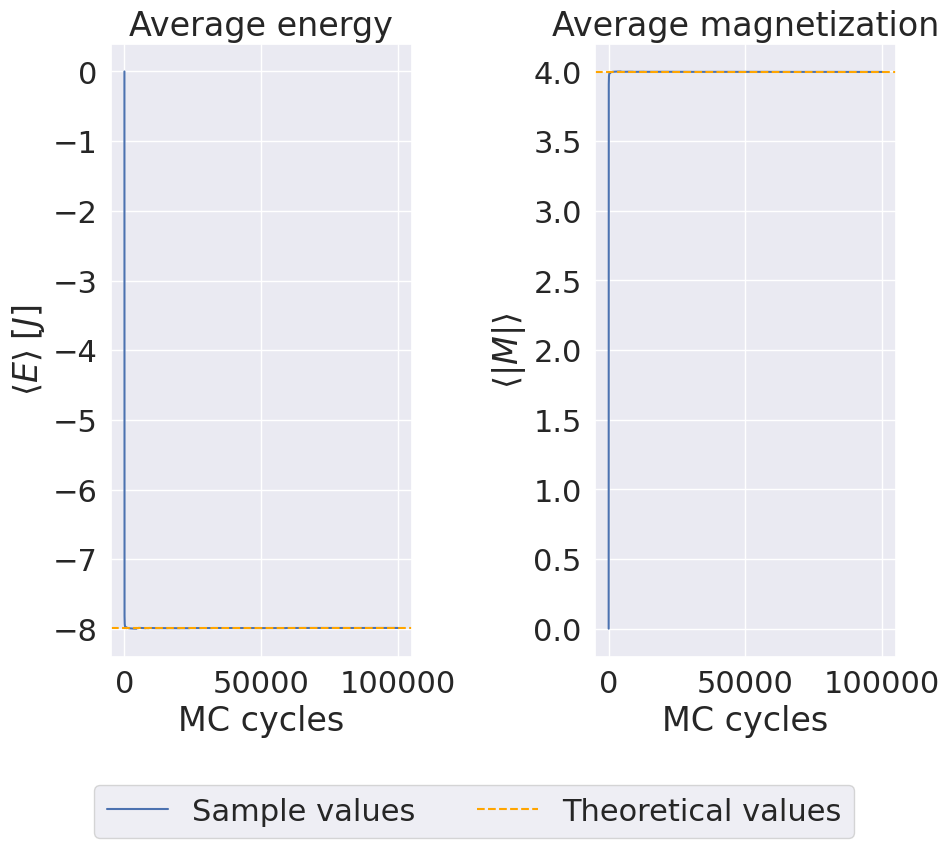

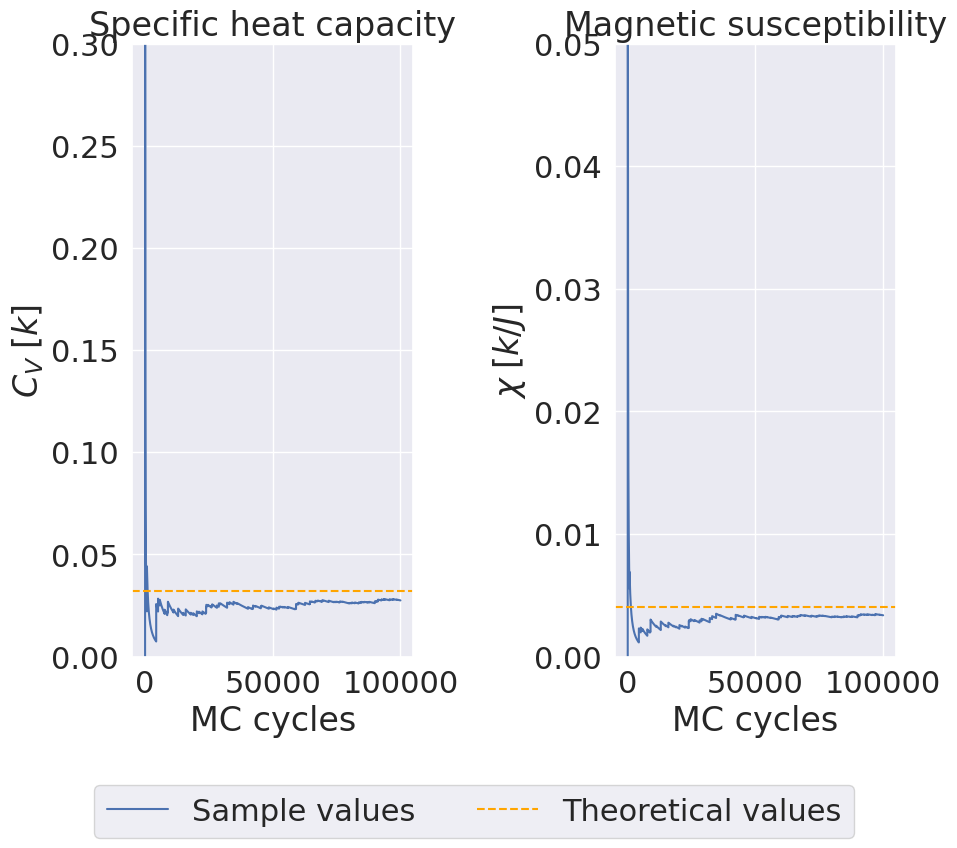

In [109]:
T = np.mean(validation2x2.temperature)
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -32*np.sinh(8*beta)/Z
engMom2 = 256*np.cosh(8*beta)/Z
avgM = (16 + 8*np.exp(8*beta))/Z
mMom2 = (32 + 32*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom, label = 'Sample values')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical values', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].plot(cycles, validation2x2.magnetization1mom)
axs[1].axhline(avgM, linestyle = '--', color = 'orange')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_ylim([0, 0.3])
axs[0].set_title('Specific heat capacity')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample values')
axs[1].axhline(chi, linestyle = '--', color = 'orange', label = 'Theoretical values')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')
axs[1].set_ylim([0, 0.05])
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
fig.tight_layout()
plt.show()




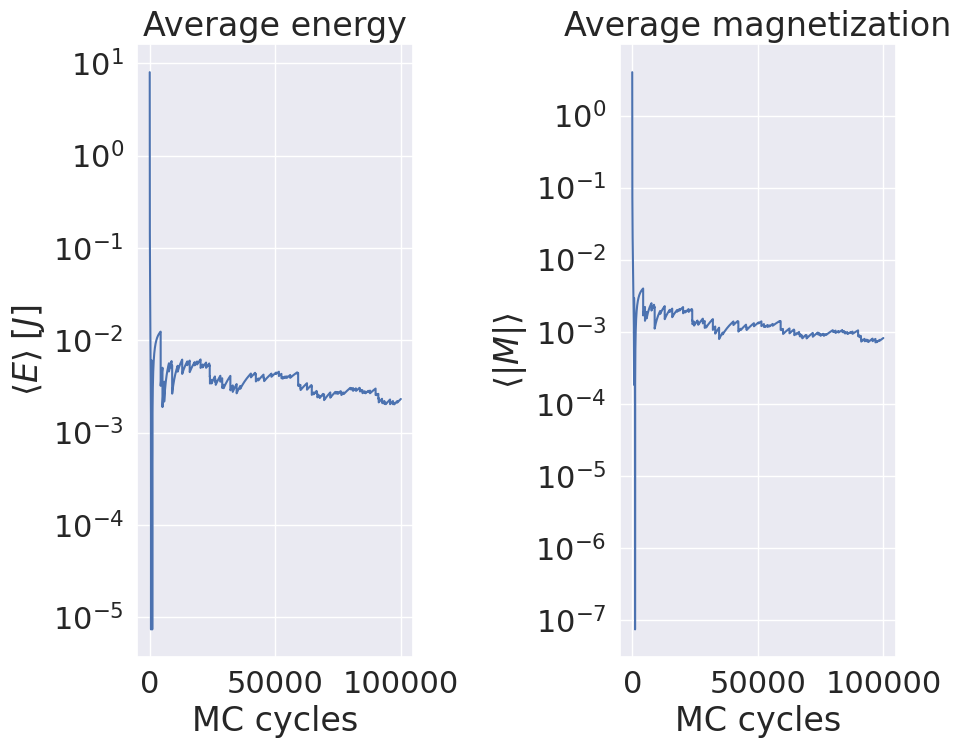

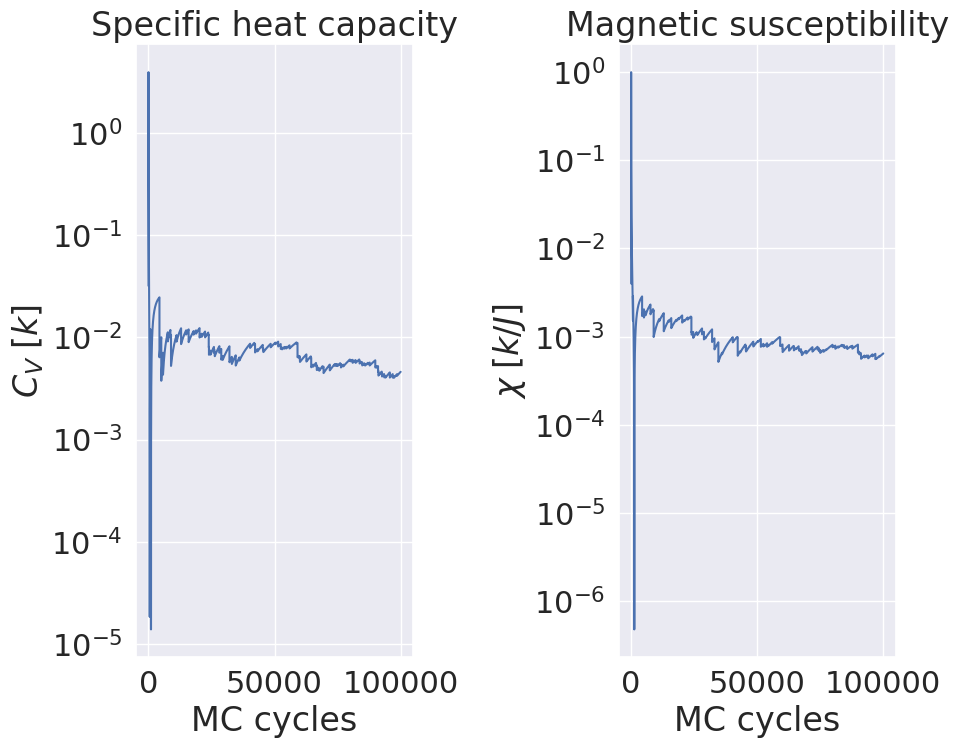

In [110]:
T = np.mean(validation2x2.temperature)
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -32*np.sinh(8*beta)/Z
engMom2 = 256*np.cosh(8*beta)/Z
avgM = (16 + 8*np.exp(8*beta))/Z
mMom2 = (32 + 32*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.energy1mom - avgEng))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].semilogy(cycles, abs(validation2x2.magnetization1mom - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.heatCapacity - cV))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_title('Specific heat capacity')

axs[1].semilogy(cycles, abs(validation2x2.susceptibility - chi))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')

fig.tight_layout()
plt.show()



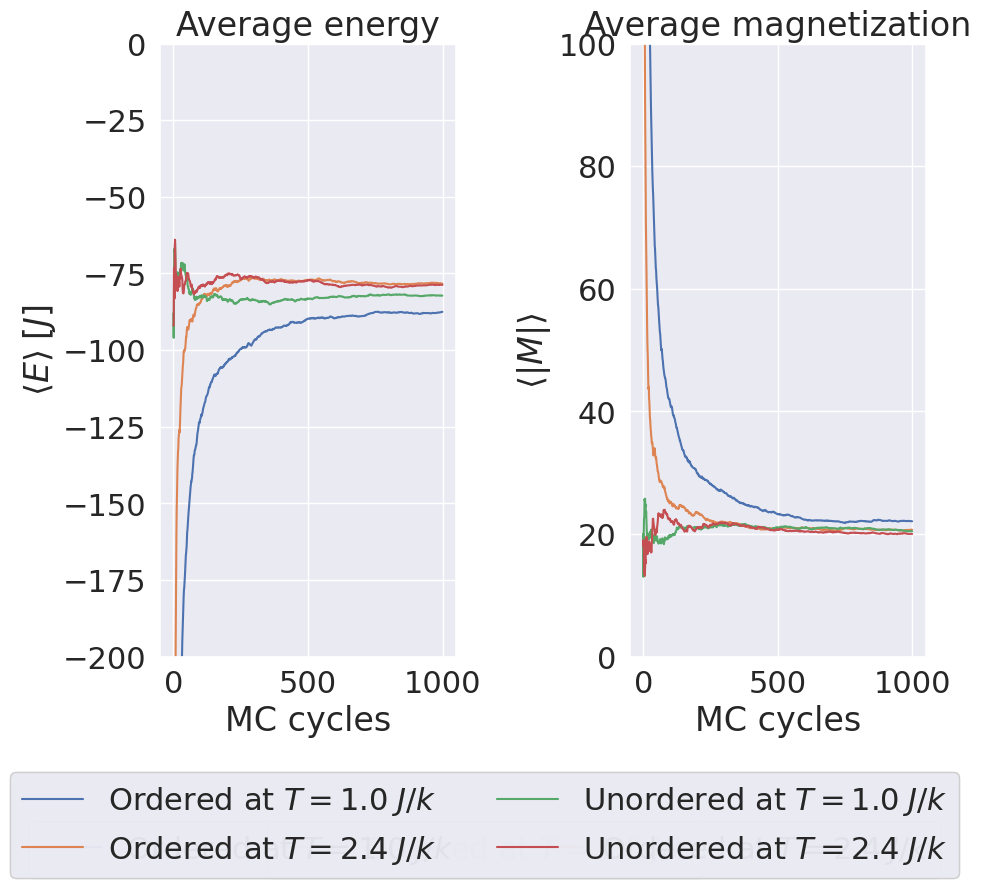

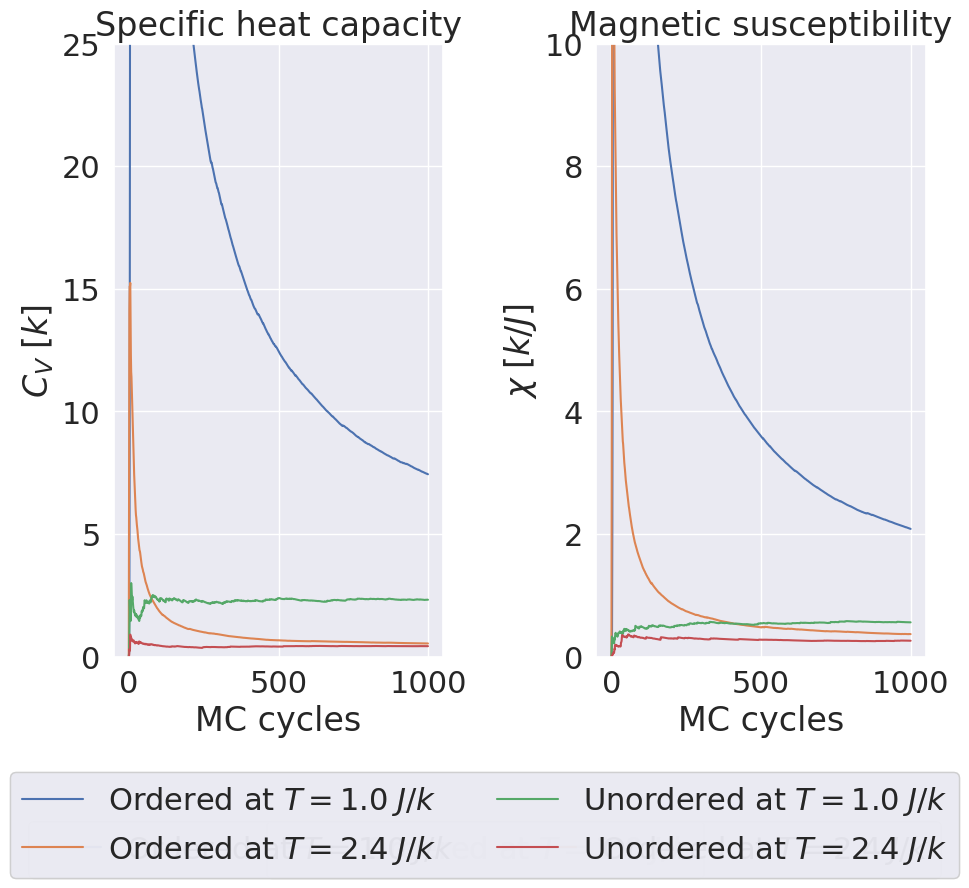

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
filenames = ['ordered1.csv', 'ordered2.csv', 'unordered1.csv', 'unordered2.csv']
names = [r'Ordered at $T = 1.0\; J/k$', r'Ordered at $T = 2.4\; J/k$', r'Unordered at $T = 1.0\; J/k$', r'Unordered at $T = 2.4\; J/k$']
for filename, name in zip(filenames, names):
    df = pd.read_csv(filename)
    cycles = np.arange(0, len(df))
    
    axs[0].plot(cycles, df.energy1mom, label = name)
    axs[0].set_xlabel('MC cycles')
    axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
    axs[0].set_title('Average energy')
    axs[0].set_ylim([-200, 0])

    axs[1].plot(cycles, df.magnetization1mom)
    axs[1].set_xlabel('MC cycles')
    axs[1].set_ylabel(r'$\langle |M| \rangle$')
    axs[1].set_title('Average magnetization')
    axs[1].set_ylim([0, 100])
    lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
for filename, name in zip(filenames, names):
    df = pd.read_csv(filename)
    cycles = np.arange(0, len(df))

    axs[0].plot(cycles, df.heatCapacity, label = name)
    axs[0].set_xlabel('MC cycles')
    axs[0].set_ylabel(r'$C_V\; [k]$')
    axs[0].set_title('Specific heat capacity')
    axs[0].set_ylim([0, 25])

    axs[1].plot(cycles, df.susceptibility)
    axs[1].set_xlabel('MC cycles')
    axs[1].set_ylabel(r'$\chi\; [k/J]$')
    axs[1].set_title('Magnetic susceptibility')
    axs[1].set_ylim([0, 10])
    lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
fig.tight_layout()
plt.show()
